In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupShuffleSplit
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
df=pd.read_csv("C:\\Users\\LENOVO\\Desktop\\New folder\\output.csv")

In [36]:
y=df['Y']
x=df.drop(['Y'],axis=1)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=13)

In [38]:
x_train

,ID,t,X1,X2,X3,X4
277,56.0,1000.0,0.586623,0.0,-0.203394,1.155288
155,32.0,0.0,-0.396754,0.0,-1.760689,1.622849
66,14.0,500.0,-0.384054,0.0,0.240737,0.177188
110,23.0,0.0,0.901591,1.0,0.602319,0.417302
400,81.0,0.0,-0.222328,0.0,0.366332,-0.701344
...,...,...,...,...,...,...
230,47.0,0.0,0.190915,0.0,1.616950,-0.135977
16,4.0,500.0,-1.072969,0.0,-0.287308,1.232253
74,15.0,2000.0,1.133769,0.0,0.280665,-1.116470
176,36.0,500.0,-0.012665,1.0,1.956079,-0.599805


In [39]:
delay_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()
educ_scaler = MinMaxScaler()
mmse_scaler = MinMaxScaler()
etiv_scaler = MinMaxScaler()

delay_scaler.fit(x_train["X1"].to_numpy().reshape(-1,1))
age_scaler.fit(x_train["X2"].to_numpy().reshape(-1,1))
educ_scaler.fit(x_train["X3"].to_numpy().reshape(-1,1))
mmse_scaler.fit(x_train["X4"].to_numpy().reshape(-1,1))

x_train["X1"] = delay_scaler.transform(x_train["X1"].to_numpy().reshape(-1,1))
x_train["X2"] = age_scaler.transform(x_train["X2"].to_numpy().reshape(-1,1))
x_train["X3"] = educ_scaler.transform(x_train["X3"].to_numpy().reshape(-1,1))
x_train["X4"] = mmse_scaler.transform(x_train["X4"].to_numpy().reshape(-1,1))

x_test["X1"] = delay_scaler.transform(x_test["X1"].to_numpy().reshape(-1,1))
x_test["X2"] = age_scaler.transform(x_test["X2"].to_numpy().reshape(-1,1))
x_test["X3"] = educ_scaler.transform(x_test["X3"].to_numpy().reshape(-1,1))
x_test["X4"] = mmse_scaler.transform(x_test["X4"].to_numpy().reshape(-1,1))


In [40]:
X_test_final = x_test.drop(["ID","t"], axis = 1)
X_train_final = x_train.drop(["ID","t"], axis = 1)

In [43]:
X_train_final.shape

(375, 4)

In [45]:
rows_n = 5
X_train_super_final = np.reshape(X_train_final.to_numpy(),(X_train_final.shape[0]//5,X_train_final.shape[1],rows_n))
X_train_super_final = np.reshape(X_train_final.to_numpy(),(X_train_final.shape[0]//5,X_train_final.shape[1],rows_n))
X_test_super_final = np.reshape(X_test_final.to_numpy(),(X_test_final.shape[0]//5,X_train_final.shape[1],rows_n))

In [46]:
def build_lstm_rnn():
    lstm_rnn = tf.keras.Sequential()
    lstm_rnn.add(tf.keras.layers.LSTM(100, return_sequences = True,input_shape = (X_train_super_final.shape[1],X_train_super_final.shape[2]) ) )
    lstm_rnn.add(tf.keras.layers.LSTM(50,return_sequences = False))
    lstm_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    lstm_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return lstm_rnn

In [55]:
y_train_super_final = np.reshape(y_train.to_numpy(),(X_train_final.shape[0]//5,rows_n))

In [58]:
y_train_super_final

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0.

Epoch 1/10


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_124\3941344263.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  lstm_rnn.fit(X_train_super_final, y_train[0:75], epochs = 10)


3/3 [==============================] - 6s 13ms/step - loss: 0.6772 - accuracy: 0.8933
Epoch 2/10
3/3 [==============================] - 0s 15ms/step - loss: 0.6345 - accuracy: 0.9067
Epoch 3/10
3/3 [==============================] - 0s 17ms/step - loss: 0.5849 - accuracy: 0.9067
Epoch 4/10
3/3 [==============================] - 0s 20ms/step - loss: 0.5364 - accuracy: 0.9067
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 0.4714 - accuracy: 0.9067
Epoch 6/10
3/3 [==============================] - 0s 11ms/step - loss: 0.4038 - accuracy: 0.9067
Epoch 7/10
3/3 [==============================] - 0s 12ms/step - loss: 0.3408 - accuracy: 0.9067
Epoch 8/10
3/3 [==============================] - 0s 16ms/step - loss: 0.3235 - accuracy: 0.9067
Epoch 9/10
3/3 [==============================] - 0s 14ms/step - loss: 0.3265 - accuracy: 0.9067
Epoch 10/10
1/1 [==============================] - 1s 1s/step
              precision    recall  f1-score   support

         0.0       0.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_124\3941344263.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(classification_report(y_test[0:25],lstm_rnn_prediction))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

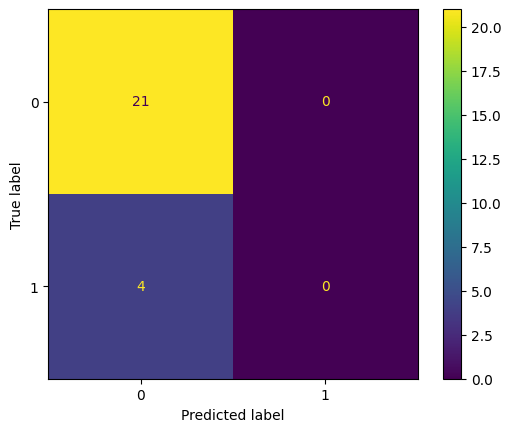

In [89]:
lstm_rnn = build_lstm_rnn()
lstm_rnn.fit(X_train_super_final, y_train[0:75], epochs = 10)
not_final_lstm_rnn_prediction = lstm_rnn.predict(X_test_super_final)
lstm_rnn_prediction = np.where(not_final_lstm_rnn_prediction > 0.5, 1, 0)
print(classification_report(y_test[0:25],lstm_rnn_prediction))
lstm_rnn_conf = confusion_matrix(y_test[0:25],lstm_rnn_prediction)
lstm_rnn_plot_conf = ConfusionMatrixDisplay(lstm_rnn_conf)
lstm_rnn_plot_conf.plot()

In [75]:
def build_gru_rnn():
    gru_rnn = tf.keras.Sequential()
    gru_rnn.add(tf.keras.layers.GRU(100, return_sequences = True,input_shape = (X_train_super_final.shape[1],X_train_super_final.shape[2])) )
    gru_rnn.add(tf.keras.layers.GRU(50,return_sequences = False))
    gru_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    gru_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return gru_rnn

Epoch 1/100


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_124\3630052749.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  gru_rnn.fit(X_train_super_final, y_train[0:75], epochs = 100)


3/3 [==============================] - 6s 10ms/step - loss: 0.6707 - accuracy: 0.6267
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5558 - accuracy: 0.9067
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 0.4486 - accuracy: 0.9067
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 0.3768 - accuracy: 0.9067
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3278 - accuracy: 0.9067
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3175 - accuracy: 0.9067
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3248 - accuracy: 0.9067
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3431 - accuracy: 0.9067
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3416 - accuracy: 0.9067
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3312 - accuracy: 0.9067
Epoch 11/100
3/3 [=============

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_124\3630052749.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  gru_rnn_conf = confusion_matrix(y_train[0:25],gru_rnn_prediction)


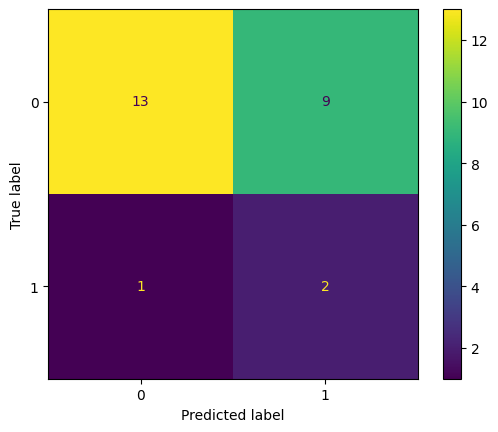

In [88]:
gru_rnn = build_gru_rnn()
gru_rnn.fit(X_train_super_final, y_train[0:75], epochs = 100)
not_final_gru_rnn_prediction = gru_rnn.predict(X_test_super_final)
gru_rnn_prediction = np.where(not_final_gru_rnn_prediction > not_final_gru_rnn_prediction.mean(), 1, 0)
gru_rnn_conf = confusion_matrix(y_train[0:25],gru_rnn_prediction)
gru_rnn_plot_conf = ConfusionMatrixDisplay(gru_rnn_conf)
gru_rnn_plot_conf.plot()

In [5]:
def build_gru_rnn():
    gru_rnn = tf.keras.Sequential()
    gru_rnn.add(tf.keras.layers.GRU(100, return_sequences = True,input_shape = (X_train_super_final.shape[1],X_train_super_final.shape[2])) )
    gru_rnn.add(tf.keras.layers.GRU(50,return_sequences = False))
    gru_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    gru_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return gru_rnn

In [ ]:
gru_rnn = build_gru_rnn()
gru_rnn.fit(X_train_super_final, y_train_super_final, epochs = 100)
not_final_gru_rnn_prediction = gru_rnn.predict(X_test_super_final)
gru_rnn_prediction = np.where(not_final_gru_rnn_prediction > 0.5, 1, 0)
print(classification_report(y_test_super_final,gru_rnn_prediction, target_names= ["Non-Demanted", "Demanted"]))
gru_rnn_conf = confusion_matrix(y_test_super_final,gru_rnn_prediction)
model_details.append(["GRU RNN", round(f1_score(y_test_super_final,gru_rnn_prediction, average = "weighted") * 100,4),gru_rnn_conf[1,0]])
gru_rnn_plot_conf = ConfusionMatrixDisplay(gru_rnn_conf)
gru_rnn_plot_conf.plot()